# Initial setup and data import

In [20]:
!pip install tweet-preprocessor nltk keras-tuner textblob
!pip install tqdm>=4.9.0

In [21]:
# Make default library imports
import pandas as pd
import numpy as np
import preprocessor as p
import re
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

plt.style.use('fivethirtyeight')

%matplotlib inline

In [22]:
# Read the data from file
data = pd.read_csv('Sentiment140.tenPercent.sample.tweets.tsv', delimiter='\t')
data.head()


,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


Null values present in labels: False
Null values present in tweet text: False



<BarContainer object of 2 artists>

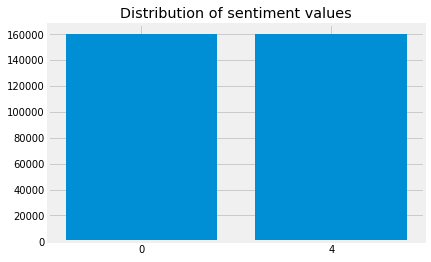

In [23]:
# Check for null values in the data
# Plot label histogram
print('Null values present in labels: ' + str(data['sentiment_label'].isnull().values.any()))
print('Null values present in tweet text: ' + str(data['tweet_text'].isnull().values.any()))
print()

plt.title('Distribution of sentiment values')
plt.bar(['0','4'], [len(data['sentiment_label'].where(data['sentiment_label'] == 0)), len(data['sentiment_label'].where(data['sentiment_label'] == 4))])


# Preprocess tweets

In [24]:
# Import NLTK dependencies
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))

# Spacy dependencies
# import spacy
# nlp = spacy.load('en', disable=['parser', 'ner'])

import random

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/junelsolis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/junelsolis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/junelsolis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/junelsolis/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [26]:
from textblob import TextBlob, Word
from nltk.stem import LancasterStemmer
from os import path
import multiprocessing as mp

### Text processing functions

In [27]:
def process_tweet(tweet):

  clean_tweet = p.clean(tweet)
  # Remove punctuations and numbers
  clean_tweet = re.sub('[^a-zA-Z]', ' ', clean_tweet)

  # Convert to lower case
  clean_tweet = clean_tweet.lower()

  # Single character removal
  clean_tweet = re.sub(r"\s+[a-zA-Z]\s+", ' ', clean_tweet)

  # Removing multiple spaces
  clean_tweet = re.sub(r'\s+', ' ', clean_tweet)

  # Remove words longer
  clean_tweet_words = clean_tweet.split(' ')
  filter_max_word_length_tweet = []
  for w in clean_tweet_words:
    if (len(w) <= 40):
      filter_max_word_length_tweet.append(w)

  clean_tweet =  " ".join(filter_max_word_length_tweet)

  # Remove multiple spaces again
  clean_tweet = re.sub(r'\s+', ' ', clean_tweet)
  return clean_tweet


tag_dict = {"J": 'a', 
            "N": 'n', 
            "V": 'v', 
            "R": 'r'}

def lemmatize(tweet):
  blob = TextBlob(tweet)

  
  words_and_tags = [(Word(w), tag_dict.get(pos[0], 'n')) for w, pos in blob.tags]
  lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]

  return " ".join(lemmatized_list)

def stem(tweet):
  return

def remove_stop_words(tweet):

  word_tokens = word_tokenize(tweet)  
  
  filtered_sentence = []  
    
  for w in word_tokens:  
      if w not in stop_words:  
          filtered_sentence.append(w)  

  return " ".join(filtered_sentence)


# def correct_spelling(tweet):
  
    # blob = TextBlob(tweet)
    # corrected = blob.correct()

    # return corrected

  # with mp.Pool() as pool:
  #   return pool.map(fix(tweet))

def spell_check_tweets(data):
  def correct_spelling

def empty_single_word_tweets(tweet):
    if (len(tweet.split(' ')) > 1):
        return tweet
    else:
        return ''



In [18]:
# Clean the tweets. 
# Remove the following:
# - URLS
# - Hashtags
# - Mentions
# - Reserved words (RT, FAV)
# - Emojis
# - Smileys
# - Numbers

if path.exists('clean_data.pkl'):
    clean_data = pd.read_pickle('clean_data.pkl')
else:

    # initialize progress bars for pandas operations
    tqdm.pandas()

    # Copy the dataset and retain the original data
    clean_data = data.copy()
    clean_data = clean_data.sample(70000) # reduce number of samples

    # Convert labels to binary
    clean_data.loc[clean_data['sentiment_label'] == 4, 'sentiment_label'] = 1

    # Run tweet preprocessor for cleaning
    clean_data['tweet_text'] = clean_data['tweet_text'].progress_apply(lambda row: process_tweet(row))

    # Lemmatize
    clean_data['tweet_text'] = clean_data['tweet_text'].progress_apply(lambda row: lemmatize(row))

    # Remove stop words
    clean_data['tweet_text'] = clean_data['tweet_text'].progress_apply(lambda row: remove_stop_words(row))

    # Correct spelling
    clean_data['tweet_text'] = clean_data['tweet_text'].progress_apply(lambda row: correct_spelling(row))

    # Remove tweets with only a single word
    clean_data['tweet_text'] = clean_data['tweet_text'].progress_apply(lambda row: empty_single_word_tweets(row))
    clean_data.drop(clean_data[clean_data['tweet_text'] == ''].index, inplace=True)

    # Save cleaned data to pickle to save time later
    clean_data.to_pickle('clean_data.pkl')




  2%|▏         | 1557/70000 [03:53<2:51:14,  6.66it/s]


KeyboardInterrupt: 

In [9]:
# Print random sample of cleaned tweets
clean_data.sample(15)

,sentiment_label,tweet_text
145100,1,beware soon theyll throw comic sans card btw e...
53817,1,know actual account backup
138260,0,boo jealous couple drink love
67386,0,think punch sleep
95998,0,wow bad headache month someone make stop
123030,0,forever please talk
140342,0,amp give current user lo plan price new iphones
725,0,asot asot amp tatw amazing yea atm beach sans ...
4098,1,hmmmmm wierd maybe hint new one
137906,1,ssssssssssmack get back girl ww


# Support Vector Machine

## Prepare the dataset

In [10]:
# Split the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_data['tweet_text'], clean_data['sentiment_label'], test_size=0.2)

## Vectorize using TF-IDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(max_features=2000)
tf_idf_vect.fit(clean_data['tweet_text'])

X_train_tf_idf = tf_idf_vect.transform(X_train)
X_test_tf_idf = tf_idf_vect.transform(X_test)


## Fit data to SVM

In [12]:
from sklearn import model_selection, naive_bayes, svm


# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', verbose=True)
SVM.fit(X_train_tf_idf, y_train)

[LibSVM]

SVC(gamma='auto', kernel='linear', verbose=True)

## Measure accuracy

In [13]:
from sklearn.metrics import accuracy_score
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test_tf_idf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  74.52809072595687


# LSTM/RNN

In [14]:
# Tokenize the text corpus
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(clean_data['tweet_text'].values)

X = tokenizer.texts_to_sequences(clean_data['tweet_text'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length

In [15]:
# Split the dataset into training and test
from sklearn.model_selection import train_test_split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, clean_data['sentiment_label'], test_size=0.2)

### Configure hyperparameter tuning

In [16]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout, SpatialDropout1D
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

def build_model(hp):

    model = Sequential()

    hp_units_embed = hp.Int('units_embed', min_value = 32, max_value = 512, step = 32)
    model.add(Embedding(5000, hp_units_embed, input_length=X.shape[1]))

    hp_spatial_dropout = hp.Float('spatial_dropout', min_value = 0.1, max_value = 0.6)
    model.add(SpatialDropout1D(hp_spatial_dropout))

    hp_units_1 = hp.Int('units_1', min_value = 32, max_value = 512, step = 32)
    model.add(LSTM(hp_units_1, return_sequences = True, dropout = 0.3, recurrent_dropout = 0.2))
    
    hp_units_2 = hp.Int('units_2', min_value = 32, max_value = 512, step = 32)
    model.add(LSTM(hp_units_2, dropout=0.3, recurrent_dropout=0.2))
    
    model.add(Dense(2, activation='softmax'))

    # Tune the learning rate for the optimizer 
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

    optimizer = hp.Choice('optimizer', ['adam', 'sgd']) 

    model.compile(loss=SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])

    return model

In [1]:
import kerastuner as kt
import tensorflow as tf
import IPython

lstm_tuner = kt.Hyperband(build_model,
                     objective = 'val_accuracy', 
                     max_epochs = 5,
                     factor = 3,
                     directory = './',
                     project_name = 'lstm_tuning')


class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

lstm_tuner.search(X_train_lstm, y_train_lstm, epochs = 1, validation_split=0.3, callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = lstm_tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

NameError: name 'build_model' is not defined

In [ ]:
# Compile and train model
lstm_model = tuner.hypermodel.build(best_hps)
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs = 6, validation_split=0.3)
model.save('lstm')